<a href="https://colab.research.google.com/github/UmarNauruzov/Neural_network/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя датасет "Пассажиры автобуса", создайте нейронную сеть для решения задачи классификации пассажиров на входящих и выходящих.

Добейтесь точности работы модели выше 90% на проверочной выборке

### Загрузка данных


In [ ]:
# загрузка библиотек

# методы для отрисовки изображений
from PIL import Image 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для генерации случайных чисел 
import random 

# Библиотека работы с массивами
import numpy as np 

# Для работы с файлами 
import os 

# импортируем модуль для загрузки данных
import gdown 

# для разделения выборок
from sklearn.model_selection import train_test_split

# для создания сети
from tensorflow.keras.models import Sequential

# для создания слоев
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# для работы с изображениями
from tensorflow.keras.preprocessing import image

# оптимизатор
from tensorflow.keras.optimizers import Adam 

# модуль для отсчета времени

import time 
import matplotlib.pyplot as plt           # Отрисовка графиков

%matplotlib inline

In [ ]:
# загрузка датасета, укажем путь к базе в Google Drive, база в виде .zip-архива 
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip', None, quiet=True) 

# Распакуем архив в директорию 'content/bus'
!unzip -q "bus.zip" -d /content/bus  

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/bus/' 

# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH) 

replace /content/bus/Входящий/01009.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

['Входящий', 'Выходящий']

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 2, метки классов: ['Входящий', 'Выходящий']


In [ ]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

Входящий : ['00987.jpg', '02622.jpg', '01855.jpg', '05554.jpg', '03117.jpg', '00981.jpg', '05537.jpg', '04878.jpg', '01382.jpg', '00001.jpg', '01756.jpg', '02620.jpg', '02328.jpg', '00679.jpg', '02326.jpg', '02846.jpg', '02750.jpg', '03786.jpg', '01647.jpg', '01205.jpg', '02424.jpg', '00031.jpg', '00825.jpg', '03727.jpg', '05154.jpg', '06198.jpg', '04760.jpg', '05054.jpg', '04540.jpg', '03198.jpg', '06125.jpg', '05776.jpg', '01939.jpg', '05365.jpg', '00045.jpg', '01248.jpg', '03179.jpg', '05766.jpg', '02511.jpg', '05876.jpg', '05413.jpg', '01618.jpg', '05074.jpg', '01403.jpg', '01031.jpg', '05934.jpg', '03244.jpg', '02202.jpg', '02500.jpg', '00357.jpg', '05064.jpg', '06463.jpg', '05101.jpg', '04571.jpg', '06039.jpg', '04000.jpg', '01977.jpg', '00306.jpg', '04400.jpg', '03601.jpg', '00746.jpg', '02941.jpg', '05701.jpg', '01981.jpg', '05104.jpg', '01386.jpg', '04826.jpg', '04320.jpg', '05771.jpg', '00048.jpg', '03417.jpg', '00406.jpg', '06431.jpg', '02199.jpg', '03465.jpg', '01419.jpg', 

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции `.imshow()` из модуля `matplotlib.pyplot`):

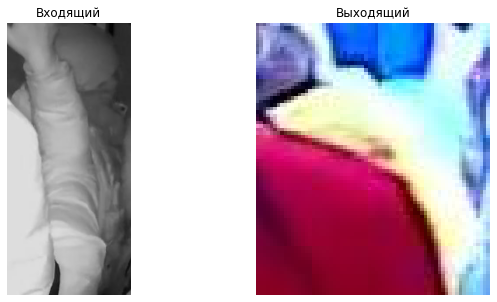

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path)) 
    
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))  
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print()
print('Общий размер базы для обучения:', len(data_labels))

Размер класса Входящий составляет 6485 фото
Размер класса Выходящий составляет 2596 фото

Общий размер базы для обучения: 9081


In [ ]:
print('Пути к файлам: ', data_files[1085:1090])
print('Их метки классов:', data_labels[1085:1090])

Пути к файлам:  ['/content/bus/Входящий/00761.jpg', '/content/bus/Входящий/00527.jpg', '/content/bus/Входящий/00280.jpg', '/content/bus/Входящий/03263.jpg', '/content/bus/Входящий/05524.jpg']
Их метки классов: [0, 0, 0, 0, 0]


In [ ]:
# Задание единых размеров изображений

IMG_WIDTH = 128                           # Ширина изображения
IMG_HEIGHT = 64                           # Высота изображения

In [ ]:
import numpy as np                        # Библиотека работы с массивами

data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT)) 
    img_np = np.array(img)                # Перевод в numpy-массив
    data_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(data_images)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 9081 фотографий следующей формы: (64, 128, 3)
Общий массив данных изображений следующей формы: (9081, 64, 128, 3)
Общий массив меток классов следующей формы: (9081,)


In [ ]:
# Нормированние массива изображений
x_data = x_data / 255.

In [ ]:
# Создание модели последовательной архитектуры
model = Sequential()

# Первый сверточный блок
model.add(Conv2D(256, (3, 3), name='First_C', padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))  # (64,128,3) --> (64,128,256) меняется кол-во фильтров
model.add(BatchNormalization(name='First_B'))  # (64,128,256) --> (64,128,256) нет изменений

# Второй сверточный блок
model.add(Conv2D(256, (3, 3), name='Second_C', padding='same', activation='relu'))  # (64,128,256) --> (64,128,256) нет изменений
model.add(MaxPooling2D(pool_size=(3, 3), name='Second_M'))  # сжимает размер в три раза, с потерей, т.к. padding='valid', глубина не изм. (64,128,256) --> (21,42,256)

# Третий сверточный блок
model.add(Conv2D(256, (3, 3), name='Third_C', padding='same', activation='relu'))  # (21,42,256) --> (21,42,256) нет изменений
model.add(BatchNormalization(name='Third_B'))  # (21,42,256) --> (21,42,256) нет изменений
model.add(Dropout(0.2, name='Third_D'))  # (21,42,256) --> (21,42,256) нет изменений

# Четвертый сверточный блок
model.add(Conv2D(256, (3, 3), name='Fourth_C', padding='same', activation='relu'))  # (21,42,256) --> (21,42,256) нет изменений
model.add(MaxPooling2D(pool_size=(3, 3), name='Fourth_M'))  # сжимает размер в три раза, хотя padding='valid', потерь нет, т.к. делится нацело, глубина не изм. (21,42,256) --> (7,14,256)
model.add(Dropout(0.2, name='Fourth_D'))  # (7,14,256) --> (7,14,256) нет изменений

# Пятый сверточный блок
model.add(Conv2D(512, (3, 3), name='Fifth_D', padding='same', activation='relu'))  # (7,14,256) --> (7,14,512) меняется количество фильтров
model.add(BatchNormalization(name='Fifth_B'))  # (7,14,512) --> (7,14,512) нет изменений

# Шестой сверточный блок
model.add(Conv2D(1024, (3, 3), name='Sixth_C', padding='same', activation='relu'))  # (7,14,1024) --> (7,14,1024) меняется кол-во фильтров
model.add(MaxPooling2D(pool_size=(3, 3), name='Sixth_M'))  # сжимает размер в три раза, с потерей, т.к. padding='valid', глубина не изм. (7,14,1024) --> (2,4,1024)
model.add(Dropout(0.2, name='Sixth_D'))  # (2,4,1024) --> (2,4,1024) нет изменений

# Блок классификации
model.add(Flatten(name='Class_1'))  # слой преобразования многомерных данных в одномерные (2,4,1024) --> (2*4*1024) --> (8192)
model.add(Dense(2048, activation='relu', name='Class_2'))  # полносвязный слой, меняется кол-во нейронов (8192) --> (2048)
model.add(Dense(4096, activation='relu', name='Class_3'))  # полносвязный слой, меняется кол-во нейронов (2048) --> (4096)
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_4'))  # выходной полносвязный слой, кол-во нейронов = количество классов (4096) --> (3)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_C (Conv2D)            (None, 64, 128, 256)      7168      
                                                                 
 First_B (BatchNormalization  (None, 64, 128, 256)     1024      
 )                                                               
                                                                 
 Second_C (Conv2D)           (None, 64, 128, 256)      590080    
                                                                 
 Second_M (MaxPooling2D)     (None, 21, 42, 256)       0         
                                                                 
 Third_C (Conv2D)            (None, 21, 42, 256)       590080    
                                                                 
 Third_B (BatchNormalization  (None, 21, 42, 256)      1024      
 )                                                    

In [ ]:
# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt           # Отрисовка графиков

%matplotlib inline
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(x_data,  # ----------------- x_train, примеры набора данных
                           y_data,  # ----------------- y_train, метки примеров набора данных
                           validation_split=0.2,  # --- 0.2 - доля данных для валидационной (проверочной) выборки, 1-0.2=0.8 останется в обучающей
                           shuffle=True,  # ----------- перемешивание данных для равномерного обучения, соответствие экземпляра и метки сохраняется 
                           batch_size=25,  # ---------- размер пакета, который обрабатывает нейронка перед одним изменением весов
                           epochs=20,  # -------------- epochs - количество эпох обучения
                           verbose=1)  # -------------- 0 - не визуализировать ход обучения, 1 - визуализировать


Epoch 1/20
291/291 [==============================] - 55s 189ms/step - loss: 0.2714 - accuracy: 0.9085 - val_loss: 1.1694 - val_accuracy: 0.0000e+00
Epoch 2/20
291/291 [==============================] - 57s 196ms/step - loss: 0.2042 - accuracy: 0.9284 - val_loss: 1.0359 - val_accuracy: 0.2471
Epoch 3/20
291/291 [==============================] - 55s 189ms/step - loss: 0.1596 - accuracy: 0.9418 - val_loss: 0.7218 - val_accuracy: 0.6681
Epoch 4/20
291/291 [==============================] - 57s 195ms/step - loss: 0.1167 - accuracy: 0.9593 - val_loss: 1.4123 - val_accuracy: 0.4463
Epoch 5/20
291/291 [==============================] - 55s 189ms/step - loss: 0.0946 - accuracy: 0.9656 - val_loss: 0.6580 - val_accuracy: 0.7611
Epoch 6/20
291/291 [==============================] - 57s 195ms/step - loss: 0.0635 - accuracy: 0.9780 - val_loss: 0.9397 - val_accuracy: 0.7012
Epoch 7/20
291/291 [==============================] - 55s 189ms/step - loss: 0.0590 - accuracy: 0.9802 - val_loss: 0.4408 - va

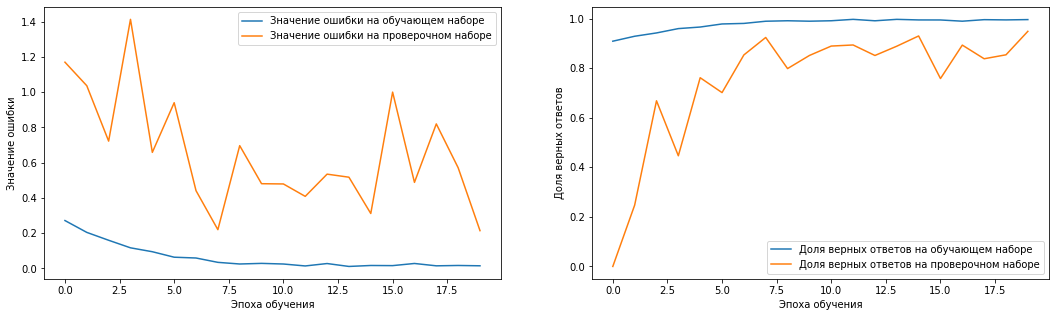

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()